In [36]:
#!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install alpha_vantage DKN6BRCK3PDUEN75
#!pip install torch
#from alpha_vantage.timeseries import TimeSeries
from pandas.tseries.offsets import QuarterEnd
import imageio
import os
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from Plots import *

### Generate a gif with the evolution of different market indexes (represented by ETFs that trck them) divided by sectors.

In [37]:
# Define ETFs and their full names, organized by sector
etf_info = {
    "SPY": ("SPDR S&P 500 ETF Trust", "General"),
    "VGT": ("Vanguard Information Technology ETF", "Technology"),
    "IWM": ("iShares Russell 2000 ETF", "General"),
    "BOTZ": ("Global X Robotics & Artificial Intelligence ETF", "Technology"),
    "IBB": ("iShares NASDAQ Biotechnology ETF", "Healthcare"),
#    "XLY": ("Consumer Discretionary Select Sector SPDR Fund", "Consumer"),
    "XLF": ("Financial Select Sector SPDR Fund", "Financial"),
    "VNQ": ("Vanguard Real Estate ETF", "Real Estate"),
    "GLD": ("SPDR Gold Trust", "Commodities"),
    "IUIT.L": ("iShares S&P 500 Information Technology Sector", "Technology"),
    "XDWT.L": ("Xtrackers MSCI World Information Technology", "Technology"),
    "ARKK": ("ARK Innovation ETF", "Technology"),
#    "XLV": ("Health Care Select Sector SPDR Fund", "Healthcare"),
    "IXJ": ("iShares Global Healthcare ETF", "Healthcare"),
    "ICLN": ("iShares Global Clean Energy ETF", "Energy"),
#    "ESGV": ("Vanguard ESG U.S. Stock ETF", "ESG"),
    "EEM": ("iShares MSCI Emerging Markets ETF", "Emerging Markets"),
    "VIG": ("Vanguard Dividend Appreciation ETF", "Dividends"),
#    "SCHD": ("Schwab U.S. Dividend Equity ETF", "Dividends")
}

# Define colors and markers
sector_styles = {
    "Technology": ('navy', 'o'),
    "Healthcare": ('green', 'X'),
    "Consumer": ('red', 'D'),
    "Financial": ('orange', 's'),
    "Real Estate": ('purple', 'P'),
    "Commodities": ('gold', '^'),
    "Energy": ('brown', '>'),
    "ESG": ('pink', '<'),
    "Emerging Markets": ('cyan', '*'),
    "Dividends": ('gray', 'v'),
    "General": ('black', 'h')
}

# Prepare directory for images
if not os.path.exists('plots'):
    os.makedirs('plots')

# Fetch historical data for the ETFs
tickers = list(etf_info.keys())
data = yf.download(tickers, start="2017-04-01", end="2024-04-01")['Adj Close']

# Verify and remove tickers with no valid data
valid_data_tickers = data.dropna(axis=1, how='all').columns
failed_tickers = [ticker for ticker in tickers if ticker not in valid_data_tickers]
for ticker in failed_tickers:
    etf_info.pop(ticker, None)

[*********************100%%**********************]  15 of 15 completed


In [38]:
start_date = pd.to_datetime("2018-04-01")
end_date = pd.to_datetime("2024-04-01")
current_date = start_date

limitx = 45
limity = 55
lower_limity = -10

while current_date <= end_date:
    # Filter data up to the current month
    monthly_data = data[:current_date]
    if not monthly_data.empty:
        daily_returns = monthly_data.pct_change()
        summary_stats = pd.DataFrame()
        summary_stats['Avg Yearly Return'] = daily_returns.mean() * 252
        summary_stats['Volatility'] = daily_returns.std() * (252 ** 0.5)

        # Generate plot for the start of the month
        scatterplot_ETFs(tickers, summary_stats, etf_info, sector_styles, current_date, limitx, lower_limity, limity)
        
        # Increment by 10 days instead of 15
        next_plot_date = current_date + pd.DateOffset(days=10)
        while next_plot_date.month == current_date.month and next_plot_date <= end_date:
            mid_month_data = data[:next_plot_date]
            if not mid_month_data.empty:
                daily_returns_mid = mid_month_data.pct_change()
                summary_stats_mid = pd.DataFrame()
                summary_stats_mid['Avg Yearly Return'] = daily_returns_mid.mean() * 252
                summary_stats_mid['Volatility'] = daily_returns_mid.std() * (252 ** 0.5)

                scatterplot_ETFs(tickers, summary_stats_mid, etf_info, sector_styles, next_plot_date, limitx, lower_limity, limity)
            
            next_plot_date += pd.DateOffset(days=10)

    # Increment to the next month
    current_date += pd.DateOffset(months=1)

# Create GIF
images = []
for filename in sorted(os.listdir('plots')):
    images.append(imageio.imread(f'plots/' + filename))
durations = [0.1 for _ in images]  # Use a constant duration for smoother transitions
imageio.mimsave('etf_performance.gif', images, duration=durations)

### Generate time-plots for all the studied ETFs using a rolling mean to smooth the curves

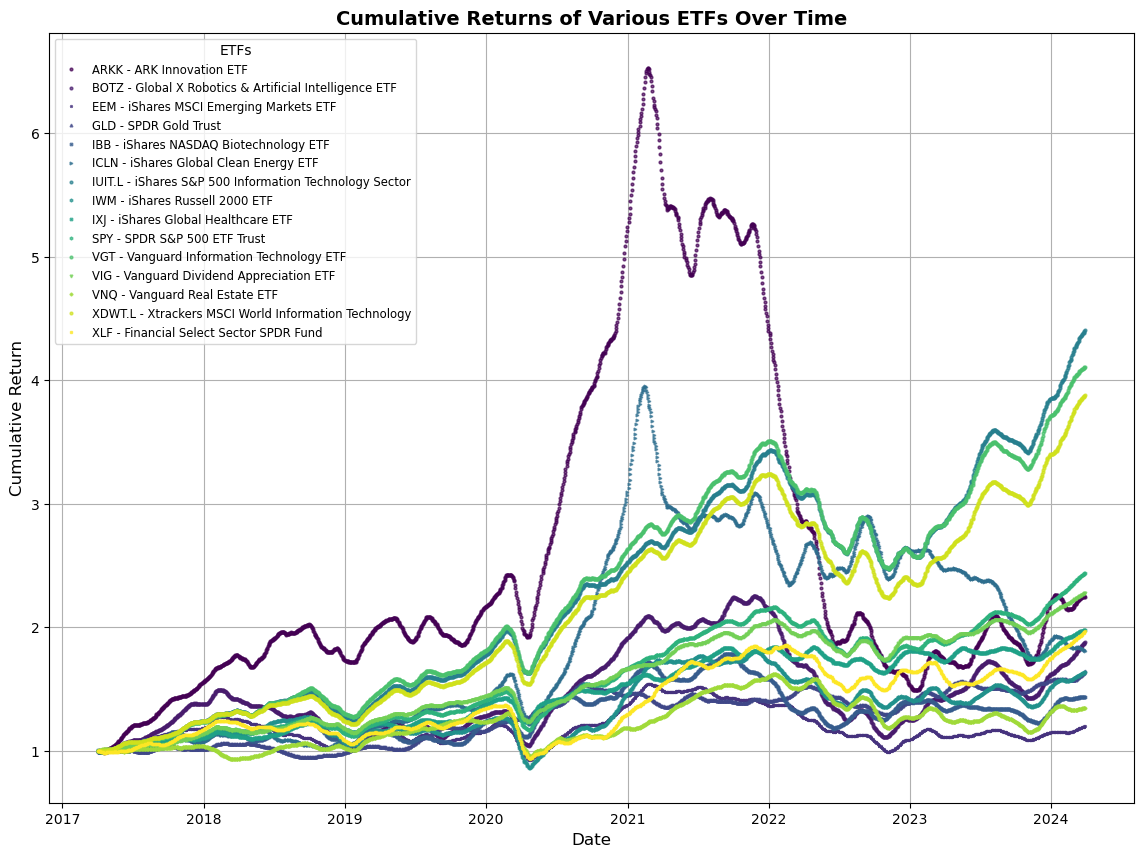

In [39]:
cumulative_returns = (1 + daily_returns).cumprod()

# Apply a rolling mean to smooth the curves, window size can be adjusted
window_size = 30  # Using a 30-day rolling window
smoothed_returns = cumulative_returns.rolling(window=window_size, min_periods=1).mean()

# Plotting cumulative returns
colors = plt.cm.viridis(np.linspace(0, 1, len(valid_data_tickers)))  # Generate colors
plt.figure(figsize=(14, 10))
for i, ticker in enumerate(valid_data_tickers):
    sector = etf_info[ticker][1]  # Get the sector
    plt.plot(smoothed_returns[ticker], sector_styles[sector][1], label=f"{ticker} - {etf_info[ticker][0]}", color=colors[i], alpha = 0.7, markersize=2)

plt.title('Cumulative Returns of Various ETFs Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.grid(True)
# Place the legend inside the plot with smaller font size
plt.legend(title="ETFs", loc='upper left', fontsize='small')
plt.show()

[****************      33%%                      ]  5 of 15 completed

start_date 2018-04-01 00:00:00
end_date 2024-04-01 00:00:00
Loading data for quarter ending: 2018-06-30 00:00:00


[*********************100%%**********************]  15 of 15 completed


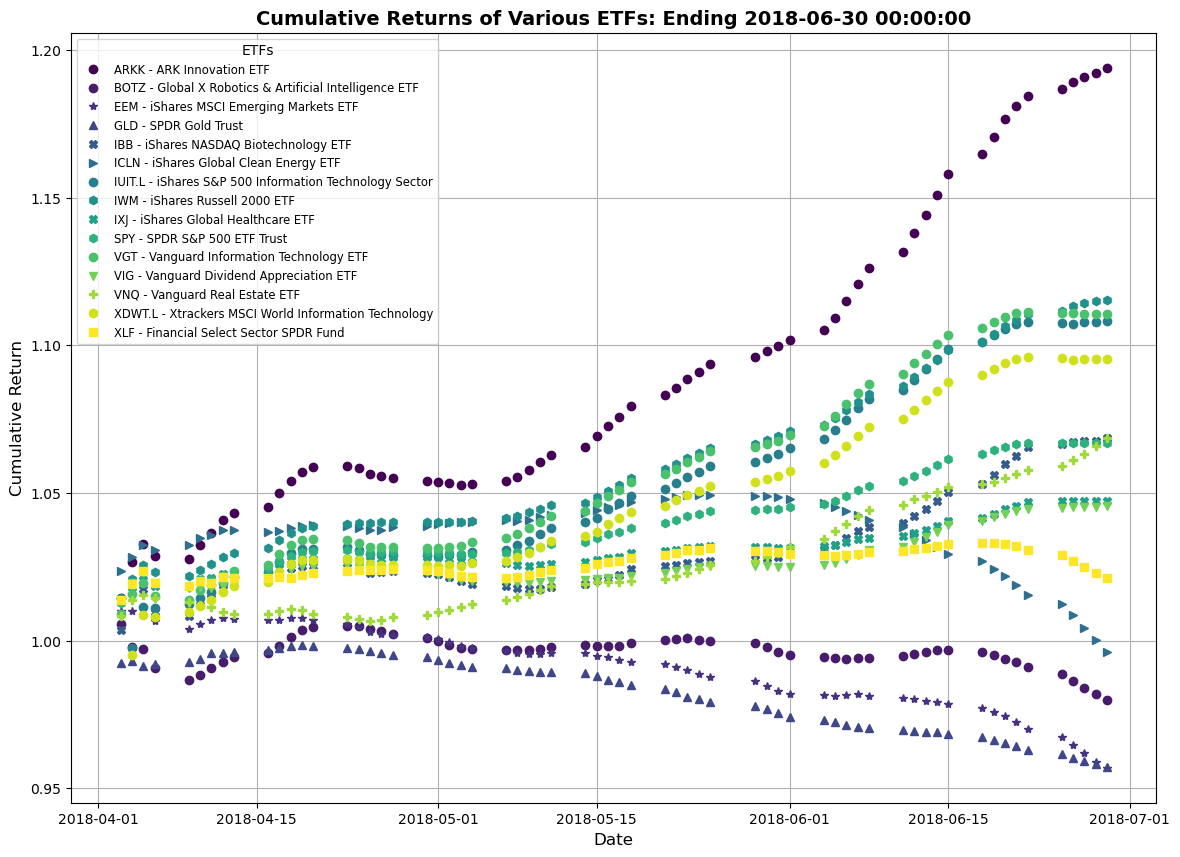

[                       0%%                      ]

Loading data for quarter ending: 2018-09-30 00:00:00


[*********************100%%**********************]  15 of 15 completed


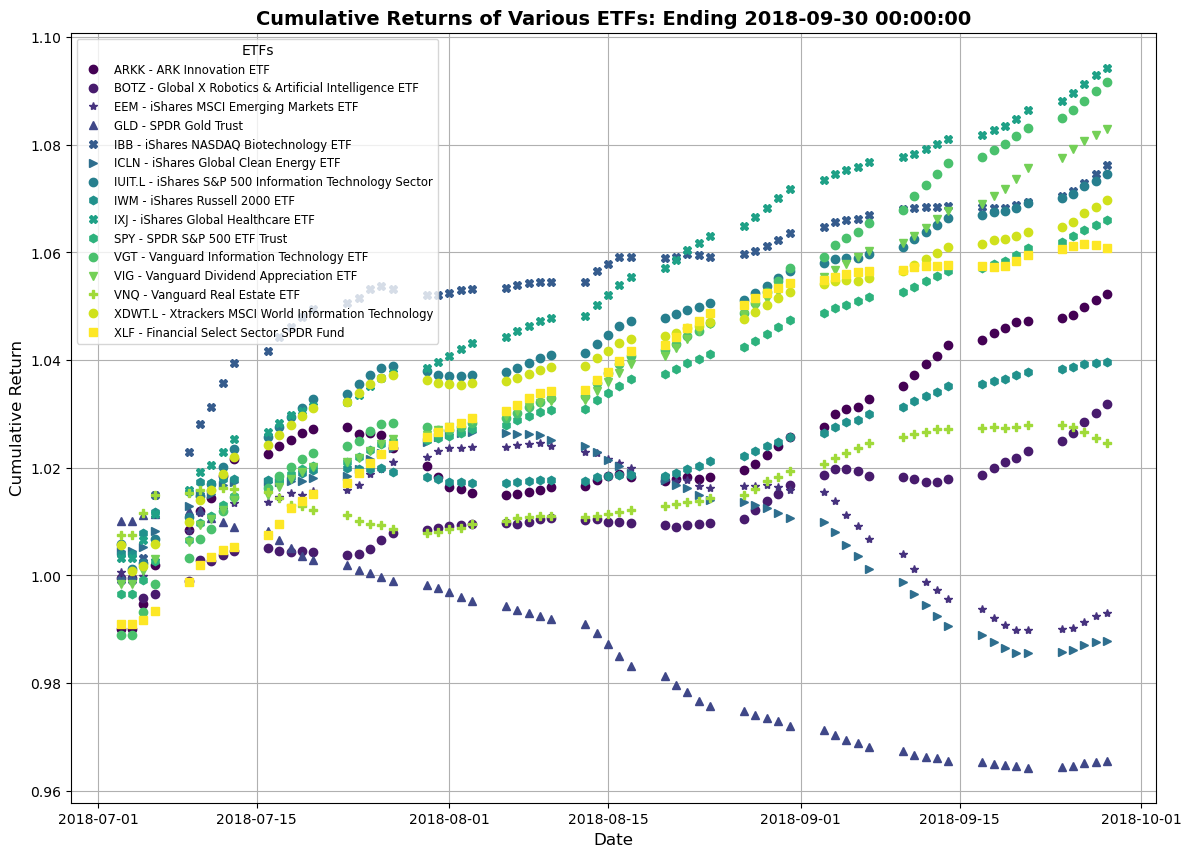

[****************      33%%                      ]  5 of 15 completed

Loading data for quarter ending: 2018-12-31 00:00:00


[*********************100%%**********************]  15 of 15 completed


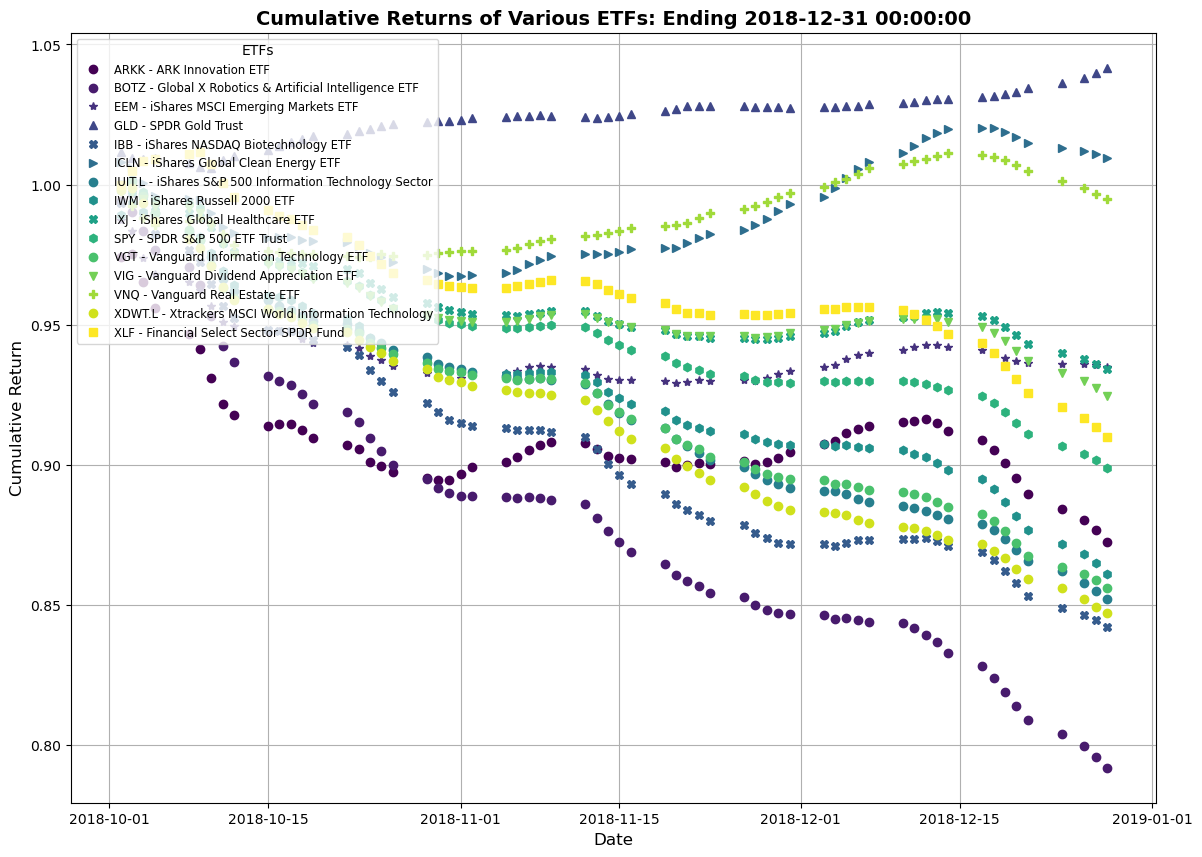

[*************         27%%                      ]  4 of 15 completed

Loading data for quarter ending: 2019-03-31 00:00:00


[*********************100%%**********************]  15 of 15 completed


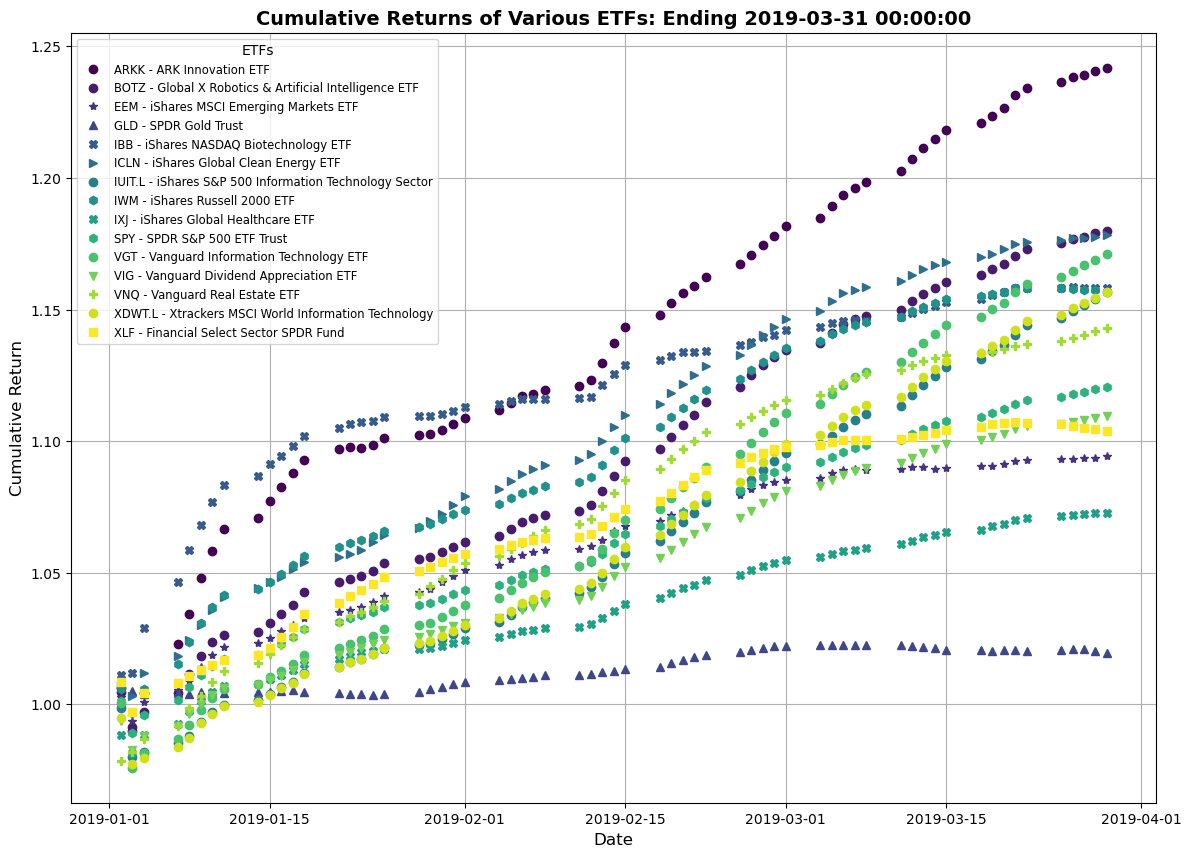

[**********            20%%                      ]  3 of 15 completed

Loading data for quarter ending: 2019-06-30 00:00:00


[*********************100%%**********************]  15 of 15 completed


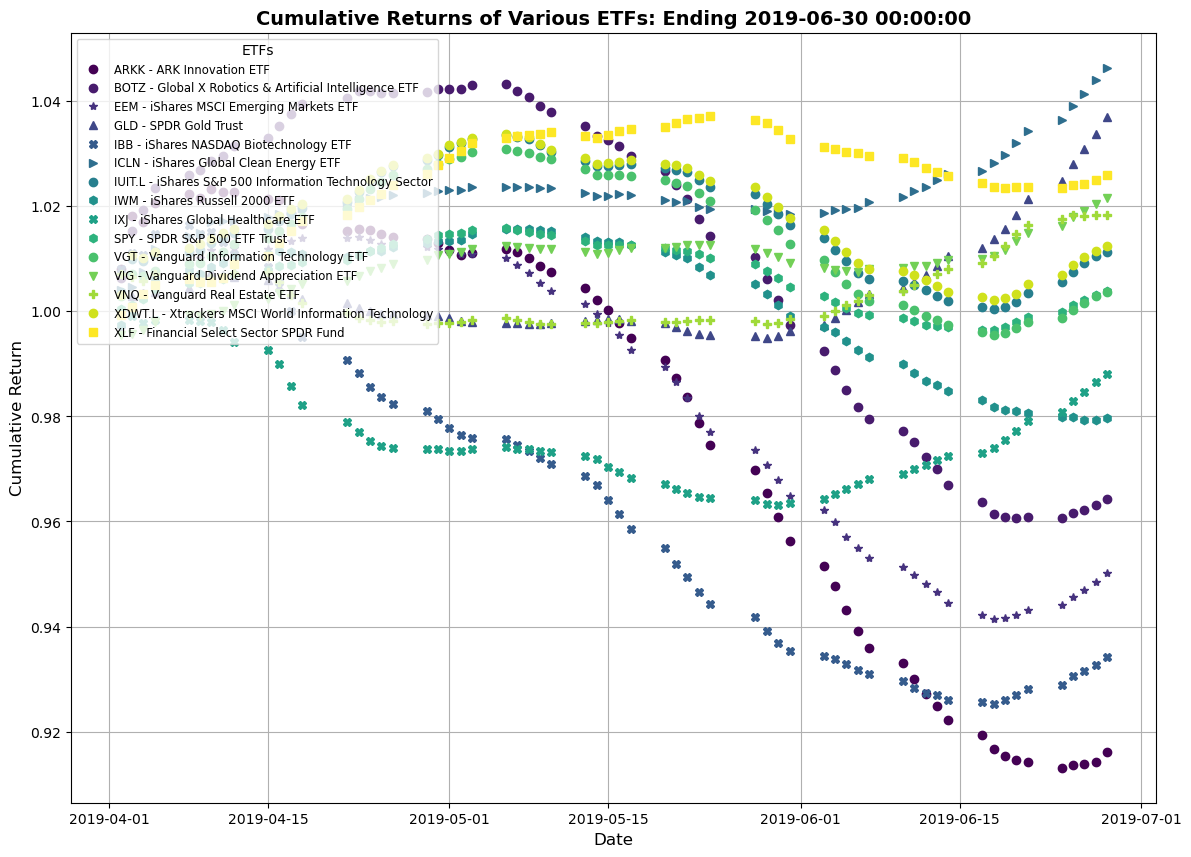

[**********            20%%                      ]  3 of 15 completed

Loading data for quarter ending: 2019-09-30 00:00:00


[*********************100%%**********************]  15 of 15 completed


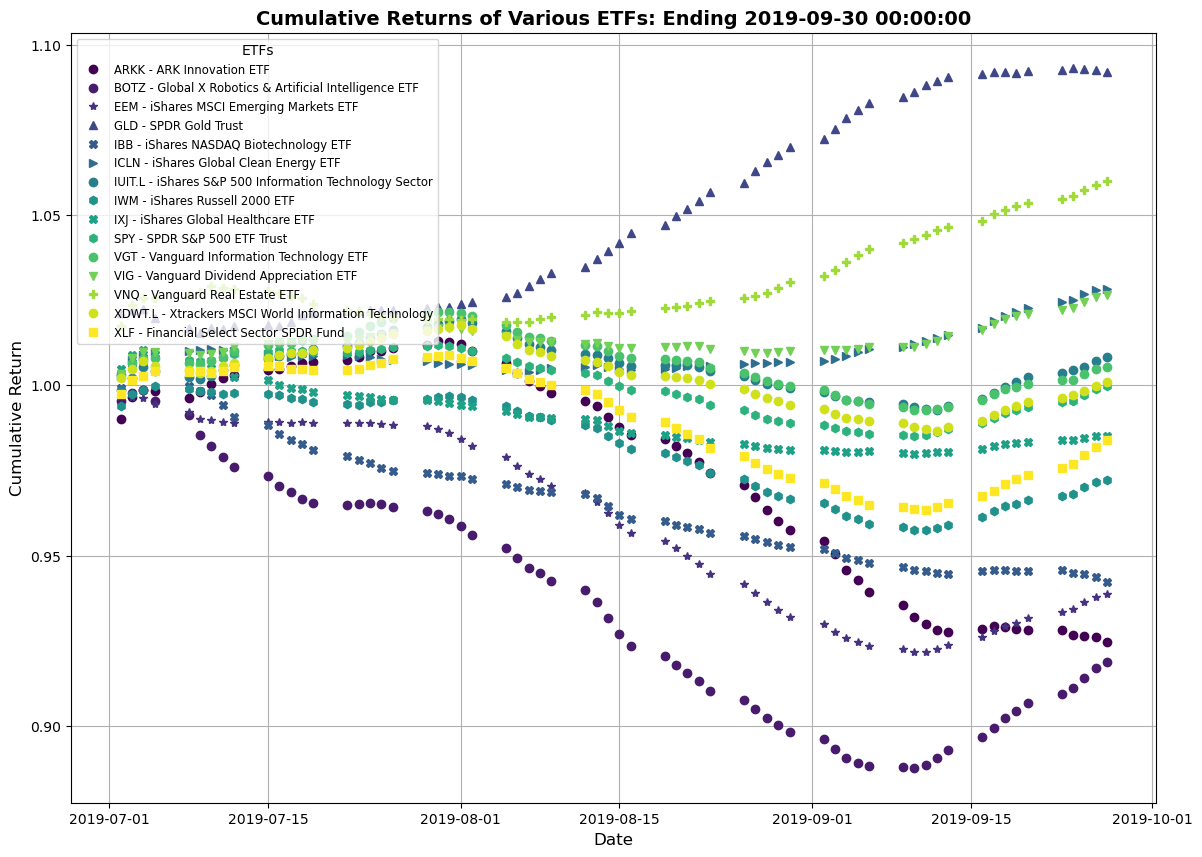

[******                13%%                      ]  2 of 15 completed

Loading data for quarter ending: 2019-12-31 00:00:00


[*********************100%%**********************]  15 of 15 completed


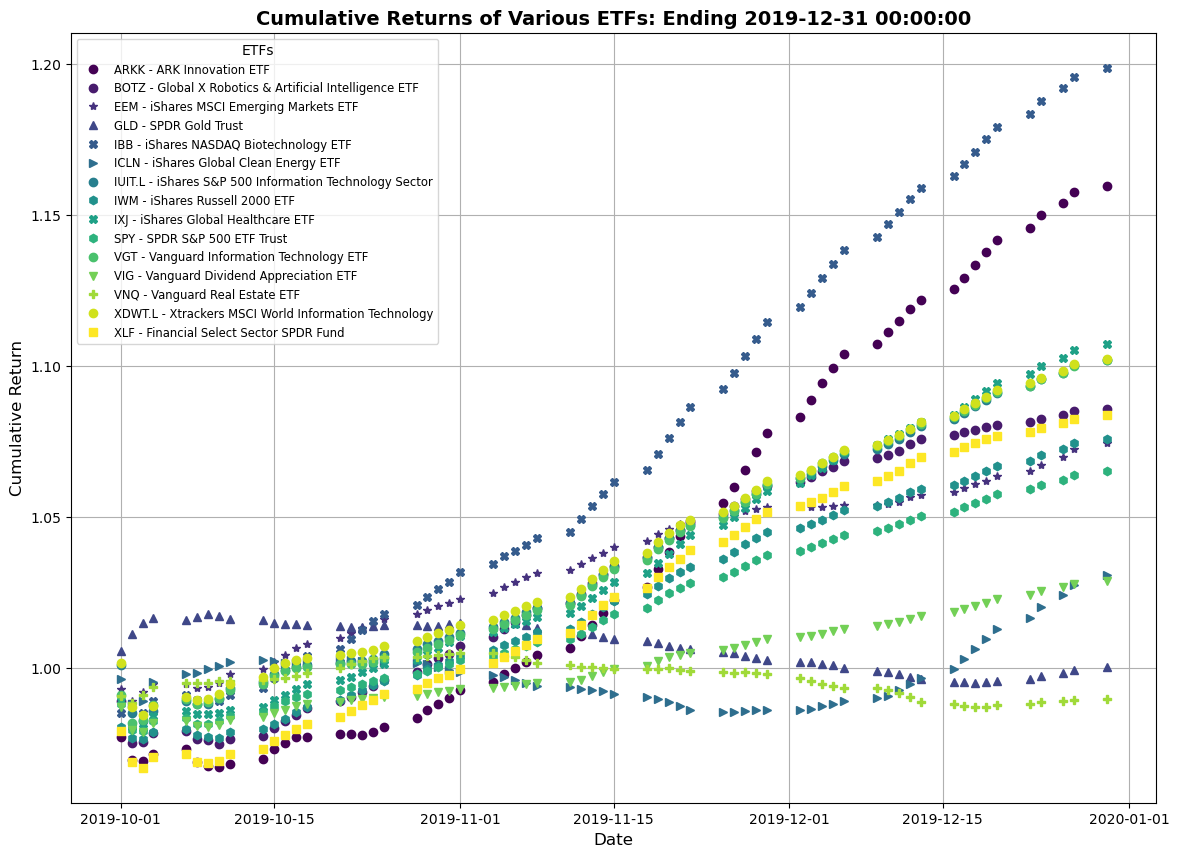

[**********            20%%                      ]  3 of 15 completed

Loading data for quarter ending: 2020-03-31 00:00:00


[*********************100%%**********************]  15 of 15 completed


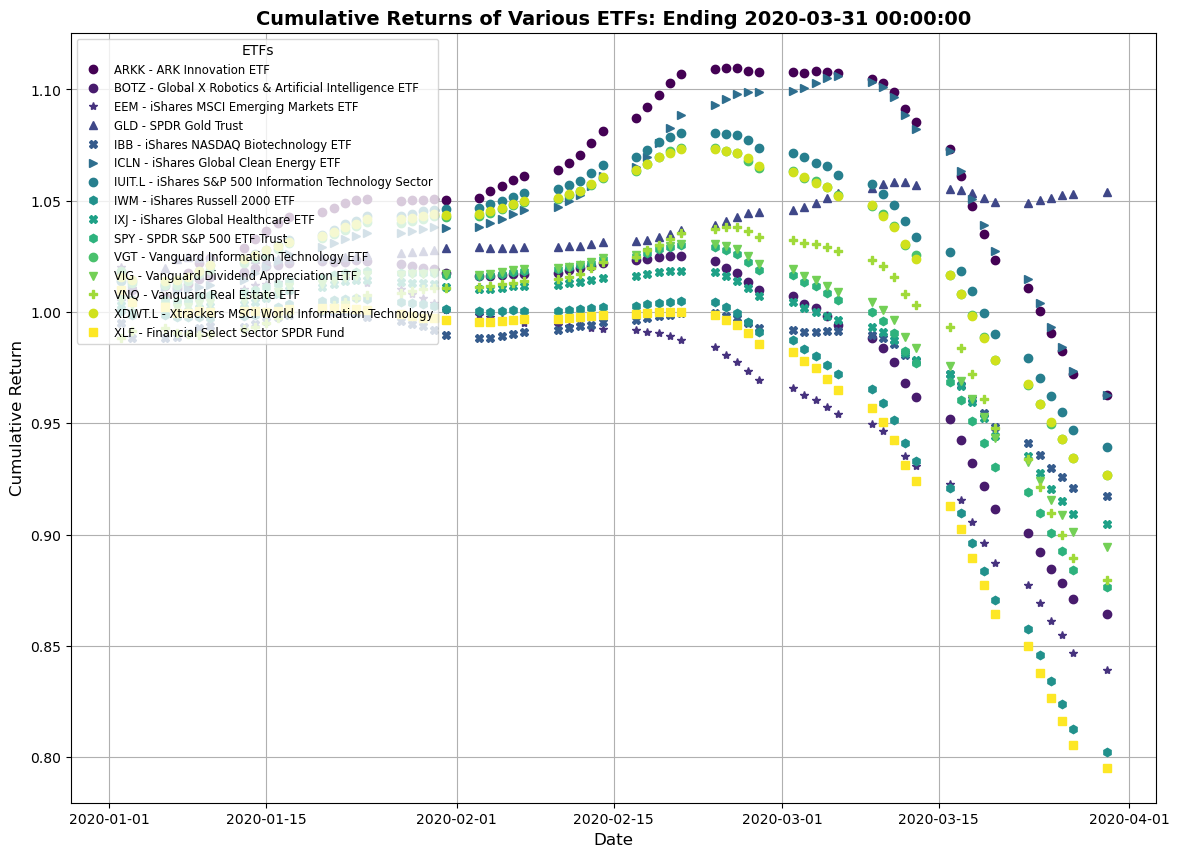

[*******************   40%%                      ]  6 of 15 completed

Loading data for quarter ending: 2020-06-30 00:00:00


[*********************100%%**********************]  15 of 15 completed


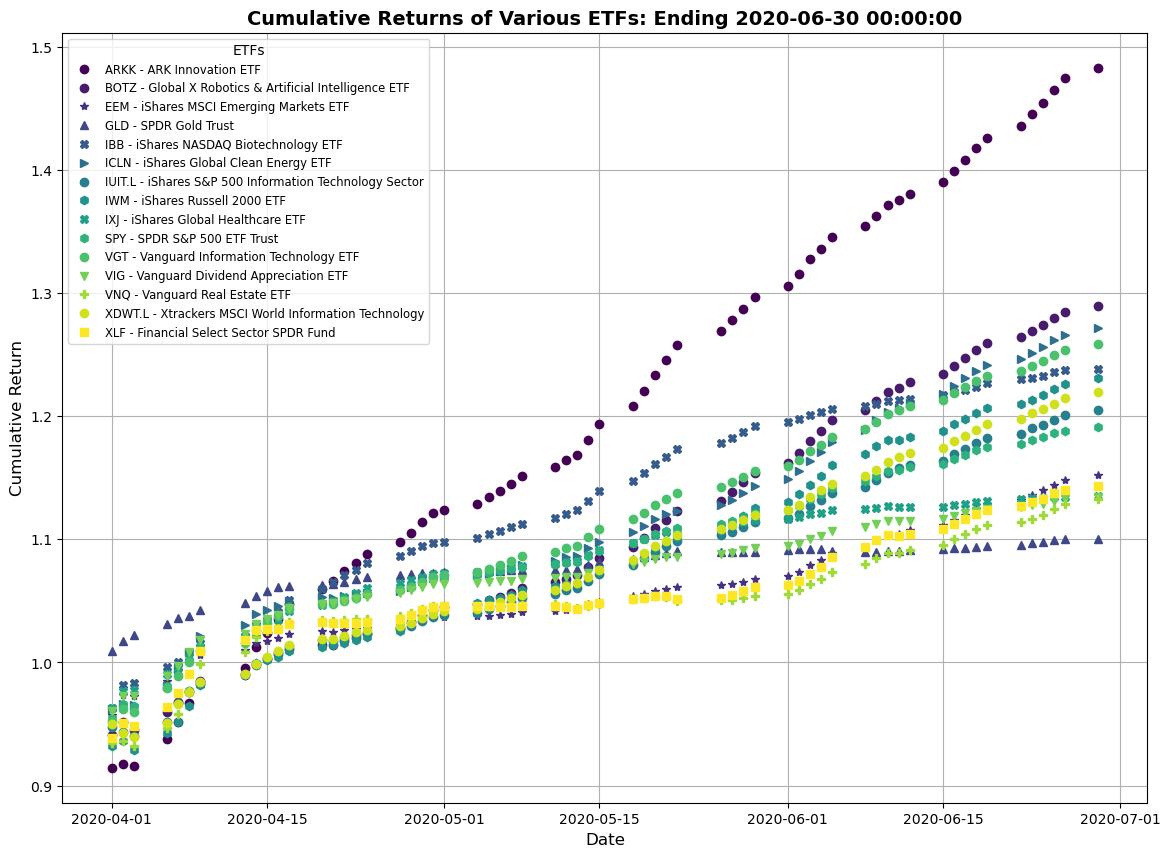

[**********************47%%                      ]  7 of 15 completed

Loading data for quarter ending: 2020-09-30 00:00:00


[*********************100%%**********************]  15 of 15 completed


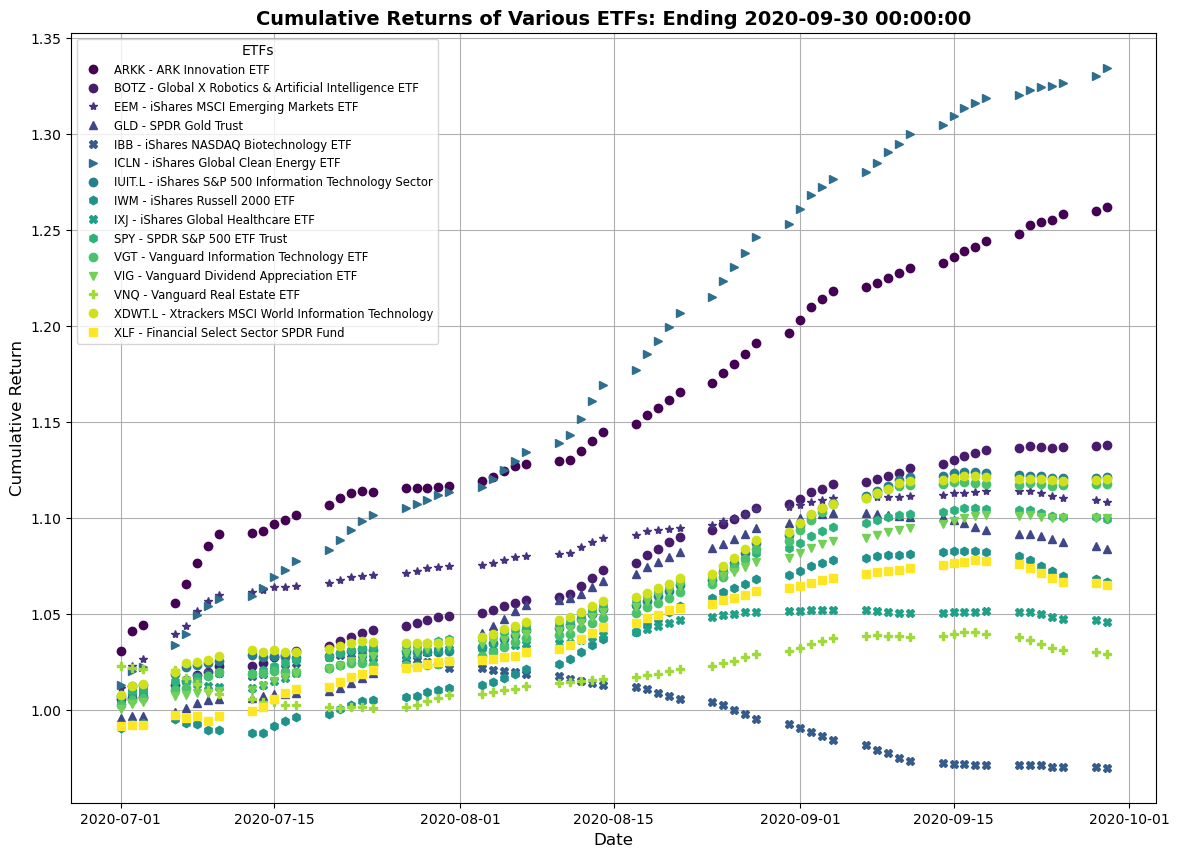

[**********************47%%                      ]  7 of 15 completed

Loading data for quarter ending: 2020-12-31 00:00:00


[*********************100%%**********************]  15 of 15 completed


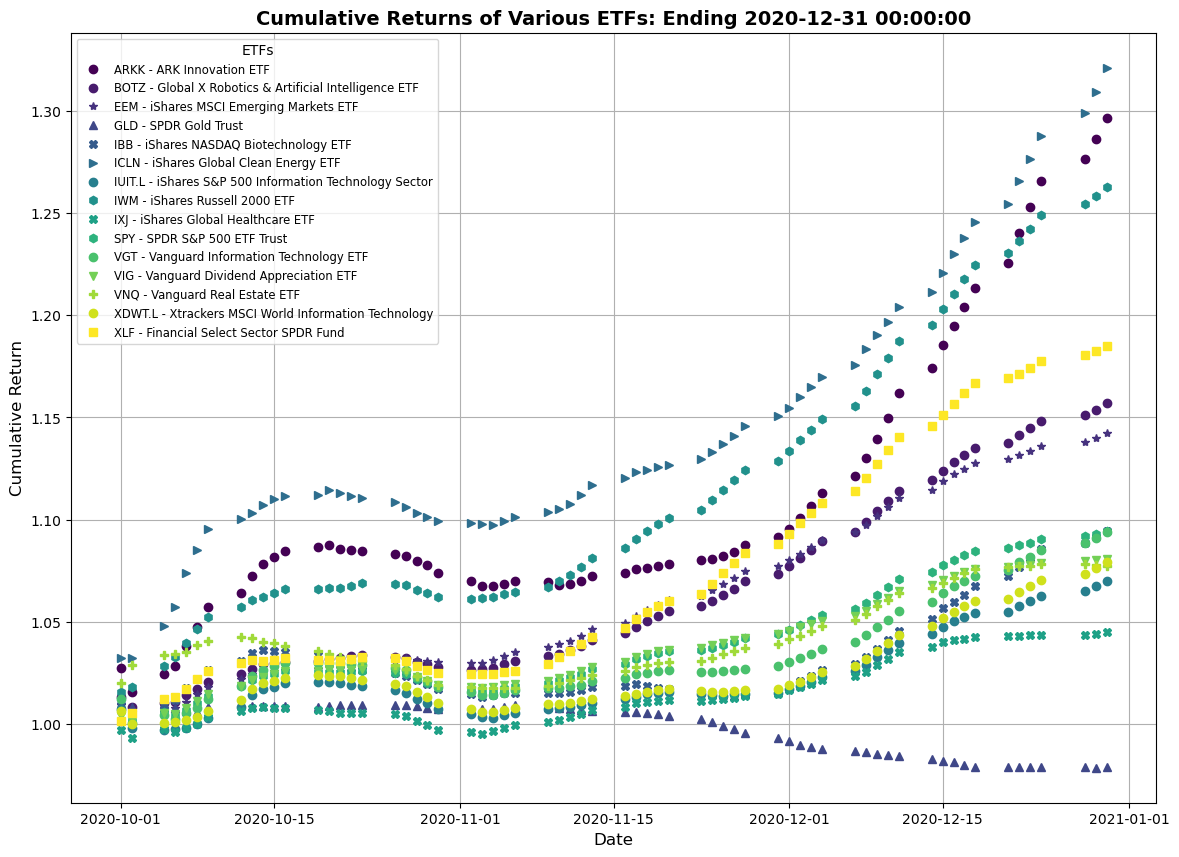

[*******************   40%%                      ]  6 of 15 completed

Loading data for quarter ending: 2021-03-31 00:00:00


[*********************100%%**********************]  15 of 15 completed


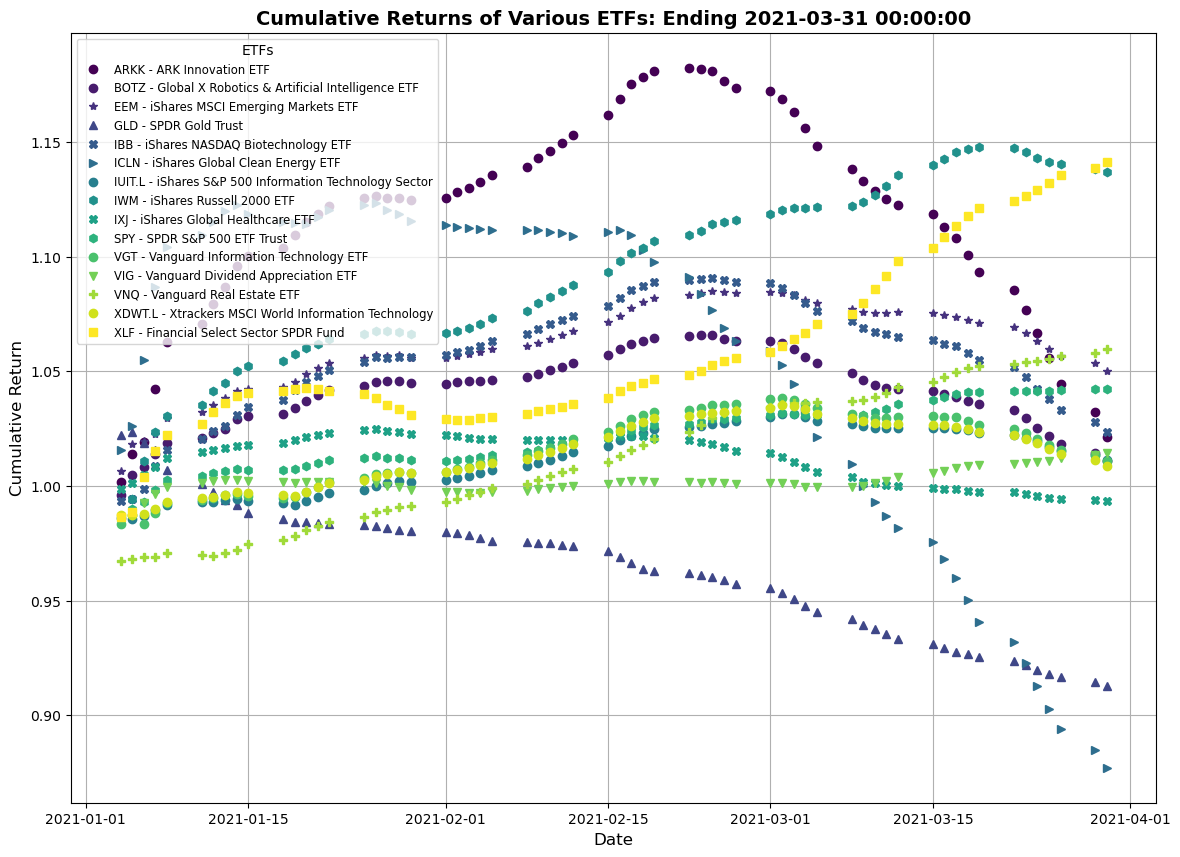

[*************         27%%                      ]  4 of 15 completed

Loading data for quarter ending: 2021-06-30 00:00:00


[*********************100%%**********************]  15 of 15 completed


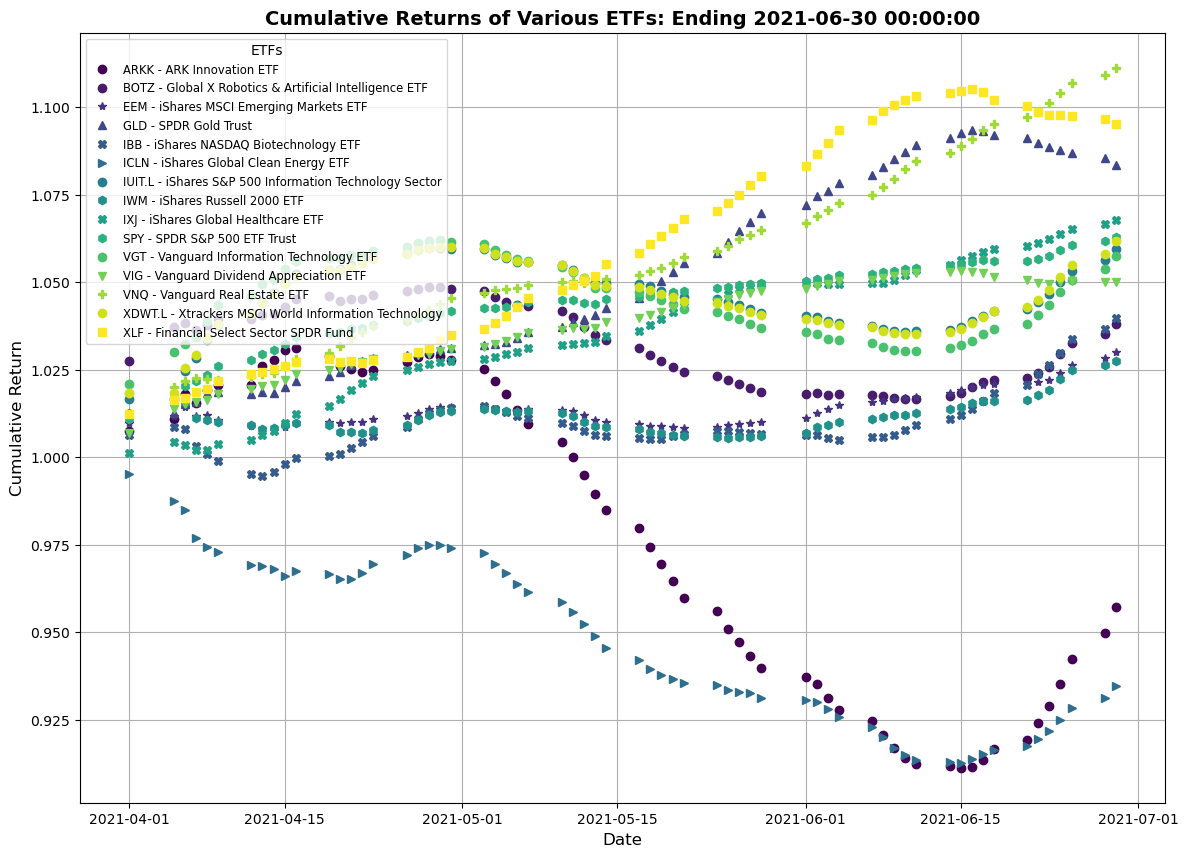

[**********            20%%                      ]  3 of 15 completed

Loading data for quarter ending: 2021-09-30 00:00:00


[*********************100%%**********************]  15 of 15 completed


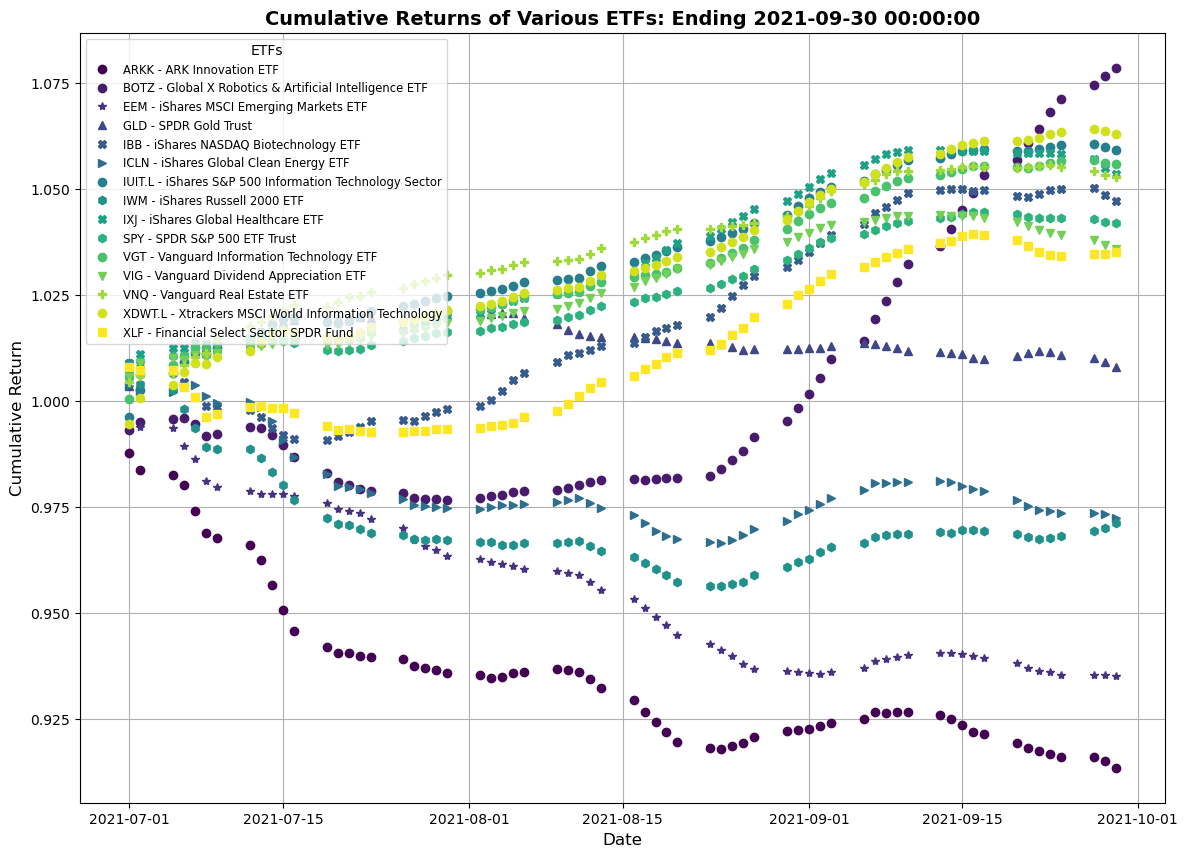

[                       0%%                      ]

Loading data for quarter ending: 2021-12-31 00:00:00


[*********************100%%**********************]  15 of 15 completed


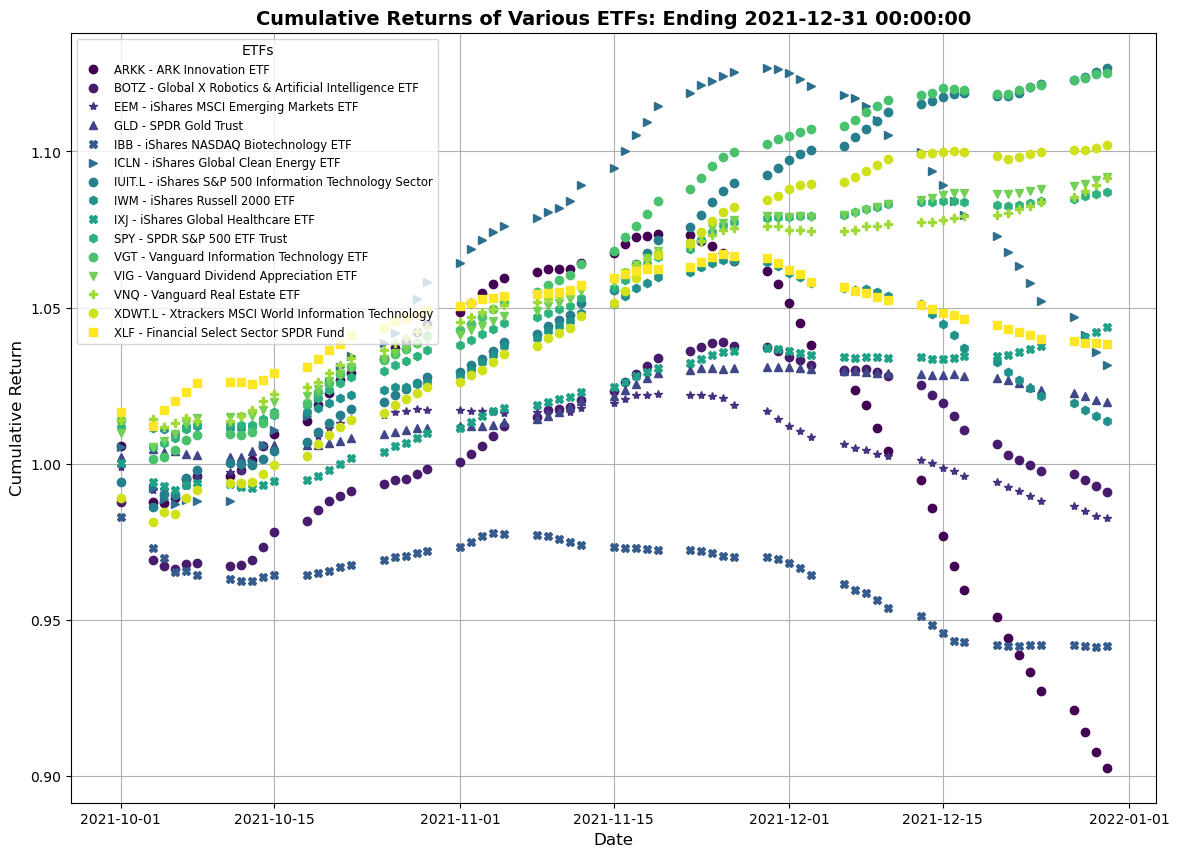

[******                13%%                      ]  2 of 15 completed

Loading data for quarter ending: 2022-03-31 00:00:00


[*********************100%%**********************]  15 of 15 completed


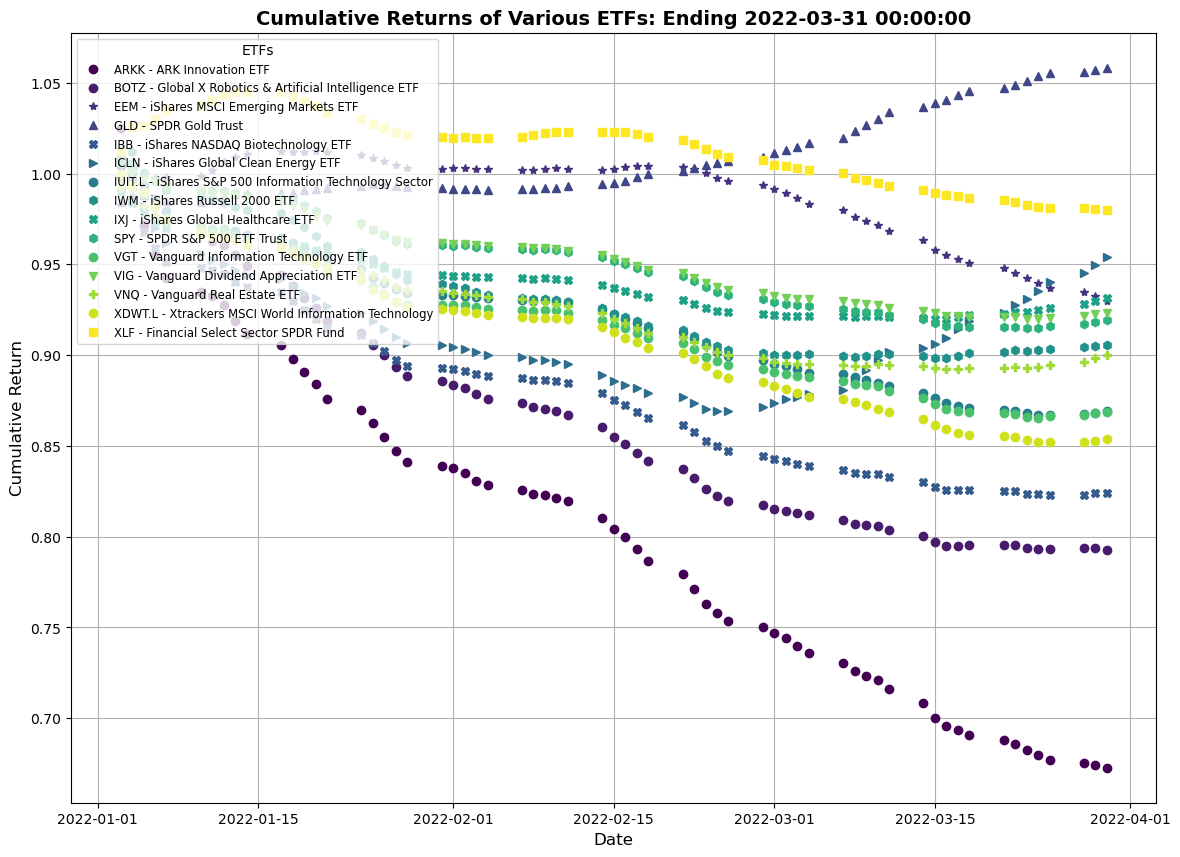

[****************      33%%                      ]  5 of 15 completed

Loading data for quarter ending: 2022-06-30 00:00:00


[*********************100%%**********************]  15 of 15 completed


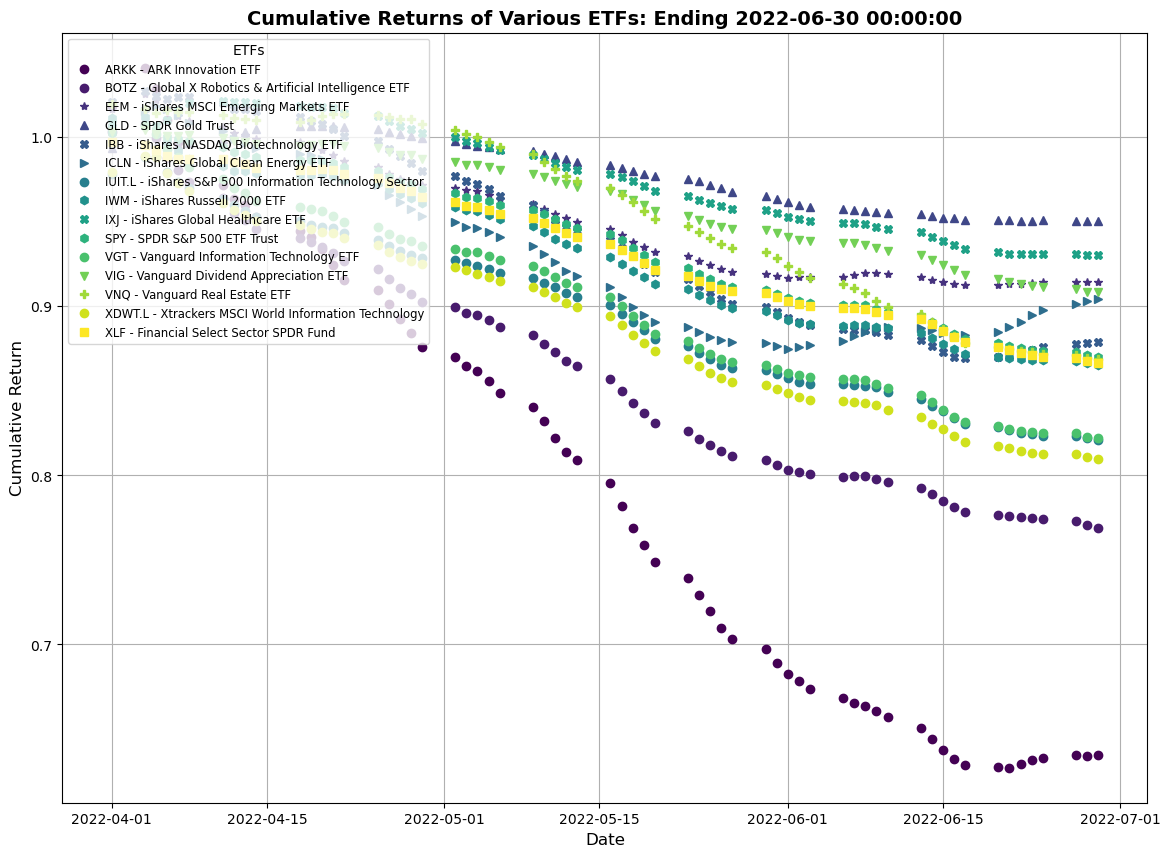

[*************         27%%                      ]  4 of 15 completed

Loading data for quarter ending: 2022-09-30 00:00:00


[*********************100%%**********************]  15 of 15 completed


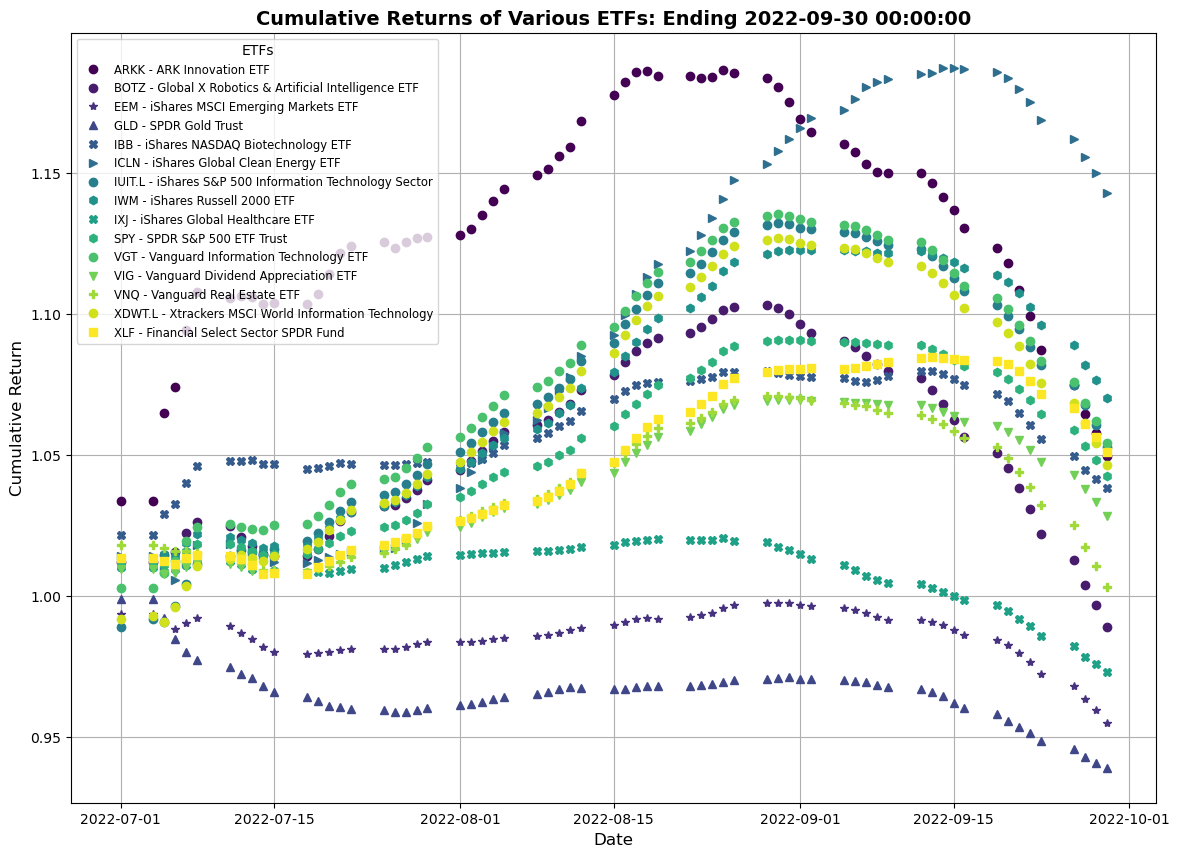

[******                13%%                      ]  2 of 15 completed

Loading data for quarter ending: 2022-12-31 00:00:00


[*********************100%%**********************]  15 of 15 completed


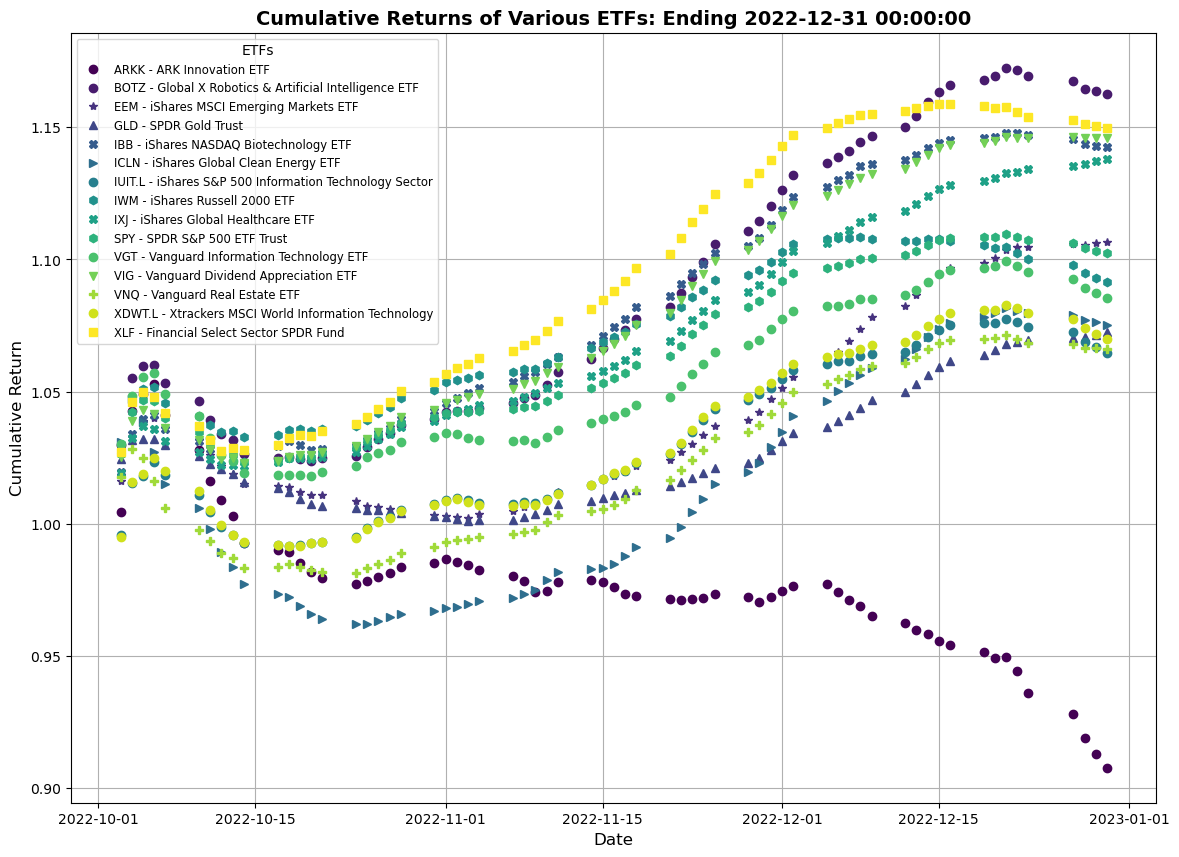

[*************         27%%                      ]  4 of 15 completed

Loading data for quarter ending: 2023-03-31 00:00:00


[*********************100%%**********************]  15 of 15 completed


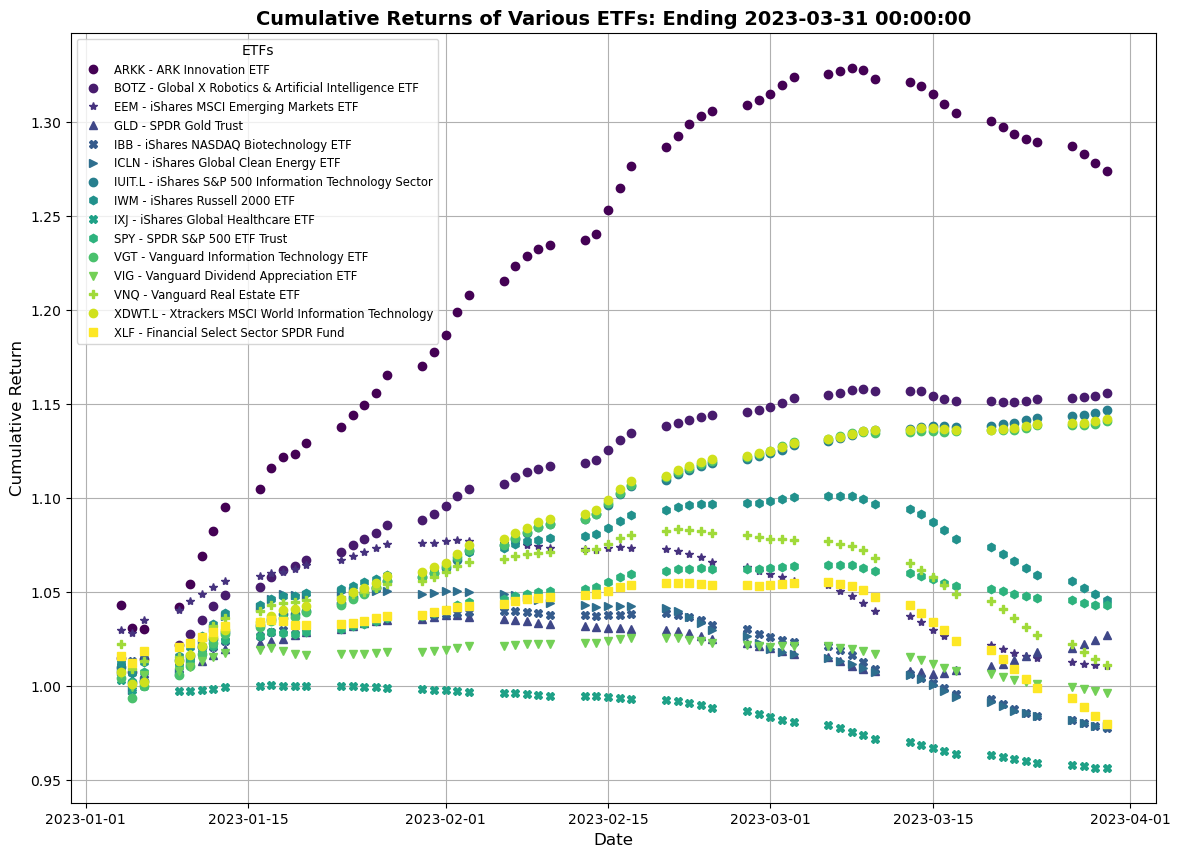

[******                13%%                      ]  2 of 15 completed

Loading data for quarter ending: 2023-06-30 00:00:00


[*********************100%%**********************]  15 of 15 completed


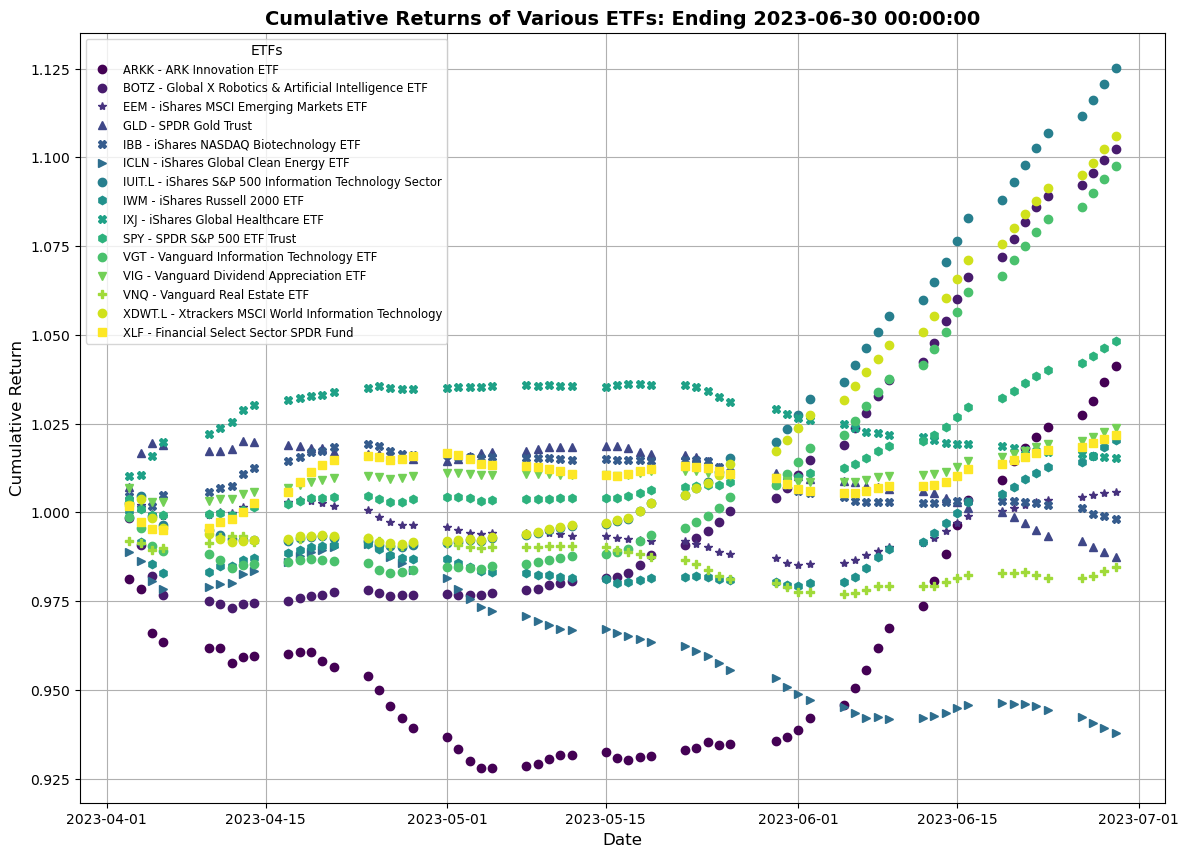

[*******************   40%%                      ]  6 of 15 completed

Loading data for quarter ending: 2023-09-30 00:00:00


[*********************100%%**********************]  15 of 15 completed


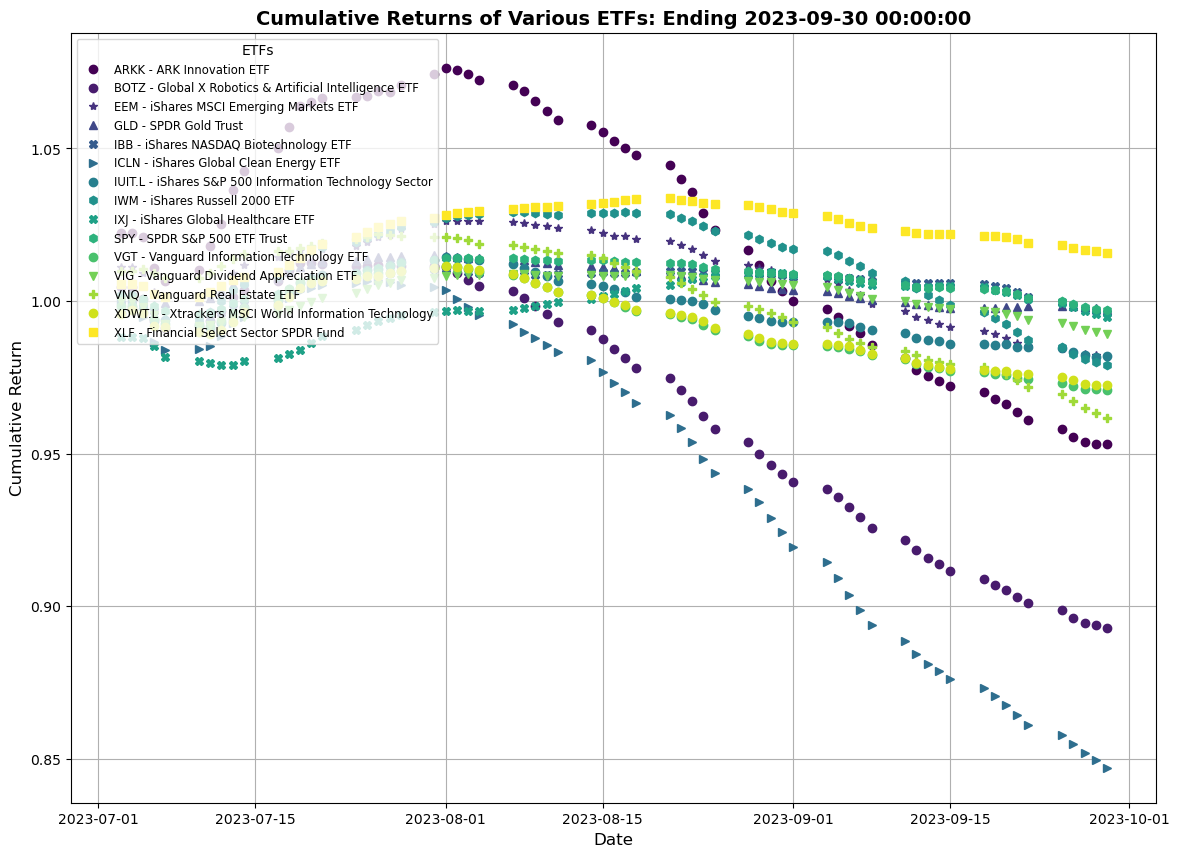

[******                13%%                      ]  2 of 15 completed

Loading data for quarter ending: 2023-12-31 00:00:00


[*********************100%%**********************]  15 of 15 completed


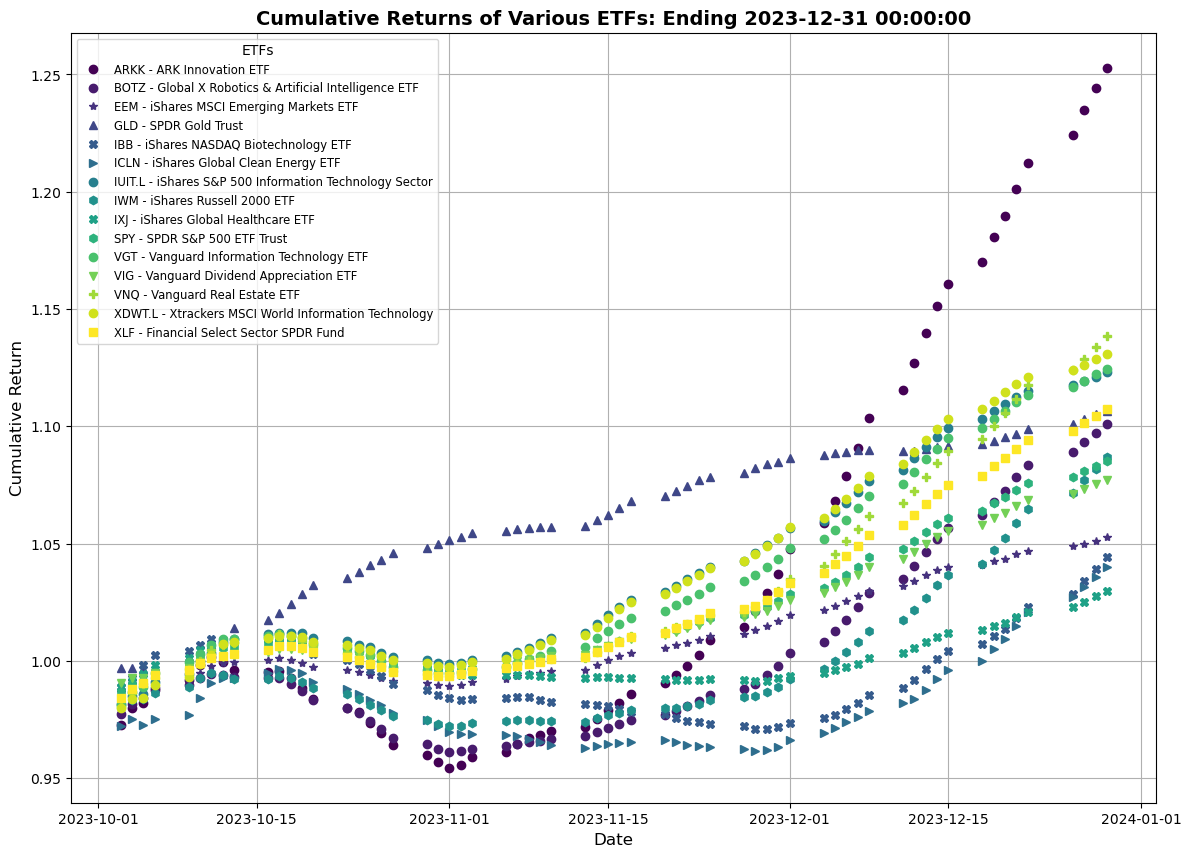

[**********************47%%                      ]  7 of 15 completed

Loading data for quarter ending: 2024-03-31 00:00:00


[*********************100%%**********************]  15 of 15 completed


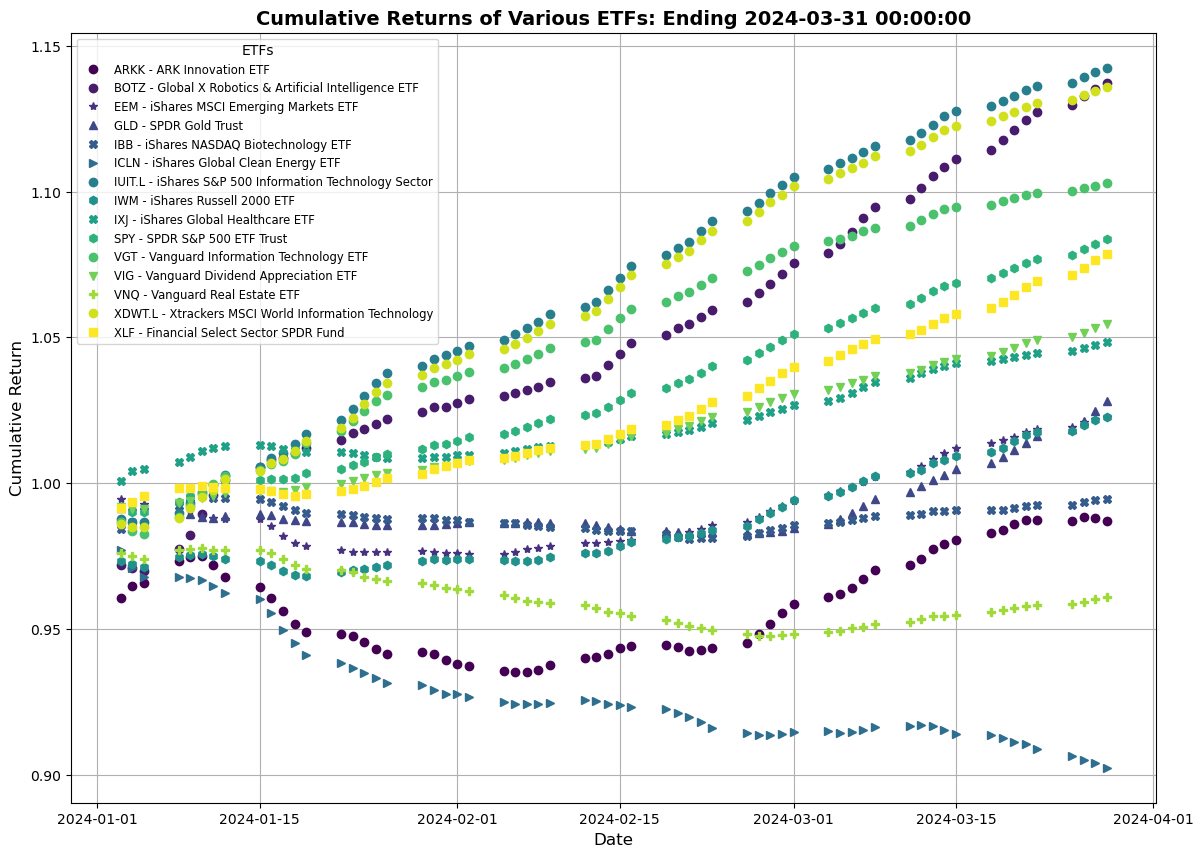

[*************         27%%                      ]  4 of 15 completed

Loading data for quarter ending: 2024-06-30 00:00:00


[*********************100%%**********************]  15 of 15 completed


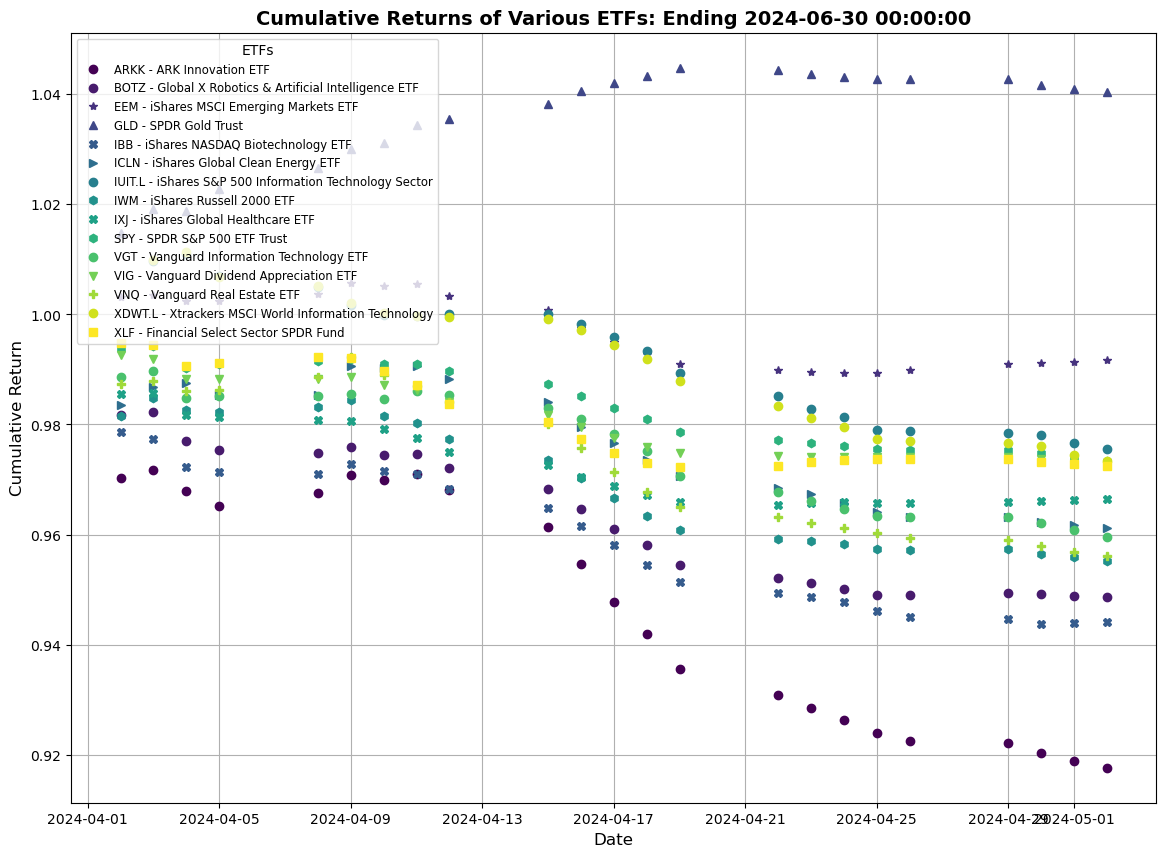

In [40]:
# Start and end dates for the entire range
start_date = pd.Timestamp("2018-04-01")
end_date = pd.Timestamp("2024-04-01")
print('start_date', start_date)
print('end_date', end_date)

# Iterate through each quarter
current_date = start_date
while current_date < end_date:
    quarter_end = current_date + QuarterEnd()
    print(f"Loading data for quarter ending: {quarter_end}")

    # Fetch historical data for the ETFs for the current quarter
    data = yf.download(list(etf_info.keys()), start=current_date, end=quarter_end)['Adj Close']

    # Verify and remove tickers with no valid data
    valid_data_tickers = data.dropna(axis=1, how='all').columns
    failed_tickers = [ticker for ticker in etf_info.keys() if ticker not in valid_data_tickers]
    for ticker in failed_tickers:
        print(f"Removing {ticker} from analysis due to no valid data.")
        etf_info.pop(ticker, None)

    # Calculate daily returns
    daily_returns = data[valid_data_tickers].pct_change()

    # Calculate cumulative returns
    cumulative_returns = (1 + daily_returns).cumprod()

    # Apply a rolling mean to smooth the curves, window size can be adjusted
    window_size = 30  # Using a 30-day rolling window
    smoothed_returns = cumulative_returns.rolling(window=window_size, min_periods=1).mean()

    # Plotting cumulative returns
    colors = plt.cm.viridis(np.linspace(0, 1, len(valid_data_tickers)))  # Generate colors
    plt.figure(figsize=(14, 10))
    for i, ticker in enumerate(valid_data_tickers):
        sector = etf_info[ticker][1]  # Get the sector
        plt.plot(smoothed_returns[ticker], sector_styles[sector][1], label=f"{ticker} - {etf_info[ticker][0]}", color=colors[i])

    plt.title(f'Cumulative Returns of Various ETFs: Ending {quarter_end}', fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cumulative Return', fontsize=12)
    plt.grid(True)
    plt.legend(title="ETFs", loc='upper left', fontsize='small')
    plt.show()

    # Move to the next quarter
    current_date = quarter_end